# EDA 04- Featuure Selection -I

## 1. Necessary Imports 

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import scipy.stats as s
import seaborn as sns

## 2. Reading dataset into CSV & Basic Data Description

### a) Reading Data

In [4]:
data=pd.read_csv("Finance.csv")

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.shape

(45211, 17)

### b) Check the Data Types

In [5]:
data.dtypes
    

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## 3.  Check Missing Data or Null Values

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## 4. Check for Data Quality Issues

### a) For categorical attributes you can inspect the unique values

You can display all the unique values and based on domain kbowledge can decide if incrrect data exists or not.

In [7]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

If you do not have the doamin knowledge , then value counts may give you an idea about the possible incorrect values

In [8]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

You can also use describe() to get a bit more information about the feature under consideration

In [9]:
data['job'].describe()

count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object

### b) For numeric attributes you can inspect all the posible set of values

If you have a domain knowledge , the minimum and maximum values can spot if incorrect data is present or not

In [10]:
data['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

If you do nat have the domain knowledge , the boxplot may give you some clue about the presence of possibly incorrect values. We call them as outliers. Outliers may be real or due to data collection problems.

<AxesSubplot:xlabel='age'>

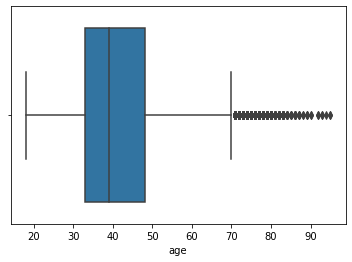

In [11]:
sns.boxplot(x=data['age'], data=data)

## 5. Feature Selection Based on Filter Methods

### a) Using Chi Square to test association between categorical attributes

The class variable is Y which is object type. So we can use Chi Square to check the association between 
all other object types and the class.The variables having strong association can be chosen as the features 
for machine learning algorithm.

Lets perform a chi-square test of independence for 'default' and class variable 'y'

In [6]:
data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [7]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [8]:
ov=pd.crosstab(data['default'],data['y'])

In [9]:
ov

y,no,yes
default,,
no,39159,5237
yes,763,52


In [12]:
b=s.chi2_contingency(ov)

In [13]:
b

(22.20224995571685,
 2.4538606753508344e-06,
 1,
 array([[39202.34261574,  5193.65738426],
        [  719.65738426,    95.34261574]]))

Here b is a tuple containing an immutable sequence of python objects . Here it contains four objcets . 
b[0] contains the value of chi2 statistic , b[1] contains the p-value of the test , b[2] contains the 
degree of freedom and b[3] contains the expected frequencies.

In [14]:
b[0]

22.20224995571685

In [15]:
b[1] 

2.4538606753508344e-06

In [16]:
b[2]

1

In [17]:
b[3]

array([[39202.34261574,  5193.65738426],
       [  719.65738426,    95.34261574]])

In [18]:
alpha=0.05

In [20]:
critical_value=s.chi2.ppf(q=1-alpha, df=b[2])
critical_value

3.841458820694124

Lets create a custom function to peform chi-square test of independence 

In [22]:
def test_dependency(data,f1,f2,alpha):
    ov=pd.crosstab(data[f1],data[f2])
    b=s.chi2_contingency(ov)
    chi2_statistic=b[0]
    p_value=b[1]
    dof=b[2]
    critical_value=s.chi2.ppf(q=1-alpha, df=dof)
    print('Significance level: ',alpha)
    print('Degree of Freedom: ',dof)
    print('chi-square statistic:',chi2_statistic)
    print('critical_value:',critical_value)
    print('p-value:',p_value)
    
    if chi2_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    
    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    


In [23]:
test_dependency(data,'default','y',0.05)

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 22.20224995571685
critical_value: 3.841458820694124
p-value: 2.4538606753508344e-06
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [24]:
test_dependency(data,'education','y',0.05)

Significance level:  0.05
Degree of Freedom:  3
chi-square statistic: 238.92350616407606
critical_value: 7.814727903251179
p-value: 1.6266562124072994e-51
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


#### Selecting k-Best Features based on Chi-Square Test 

We will be using SelectKBest( )which takes numeric data only . So for that we have to encode all the categorical.We will be using mannual encoding for ordinal features whereas label encoding for all other nominal features.

#### Encoding Ordinal Features

In [21]:
ordinal_list=['education']
data['education'] = data['education'].replace(['primary','secondary','tertiary','unknown'],[1,2,3,0])


In [22]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,3,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,2,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,2,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,0,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,0,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### Encoding Nominal Features

In [24]:
ordinal_list=['education']
data['education'] = data['education'].replace(['primary','secondary','tertiary','unknown'],[1,2,3,0])

nominal_list = []
for i in data.columns.tolist():
    if (data[i].dtype=='object') and (i not in ordinal_list):
        nominal_list.append(i)
print (nominal_list)        
print('Number of nominal features:', str(len(nominal_list)))

['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Number of nominal features: 9


In [28]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for column in nominal_list:
    data[column]=encoder.fit_transform(data[column])

In [29]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,3,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,2,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,2,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,0,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,0,0,1,0,0,2,5,8,198,1,-1,0,3,0


#### Combining ordinal and nominal features after encoding 

In [30]:
ordinal_data=data[ordinal_list]
nominal_data=data[nominal_list]
categorical_data = pd.concat([ordinal_data,nominal_data], axis=1)

In [31]:
categorical_data

,education,job,marital,default,housing,loan,contact,month,poutcome,y
0,3,4,1,0,1,0,2,8,3,0
1,2,9,2,0,1,0,2,8,3,0
2,2,2,1,0,1,1,2,8,3,0
3,0,1,1,0,1,0,2,8,3,0
4,0,11,2,0,0,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...
45206,3,9,1,0,0,0,0,9,3,1
45207,1,5,0,0,0,0,0,9,3,1
45208,2,5,1,0,0,0,0,9,2,1
45209,2,1,1,0,0,0,1,9,3,0


#### Selecting K Best Features based on Chi-Square Test 

In [42]:
X=categorical_data.drop('y',axis=1)
Y=categorical_data['y']
chi_scores = chi2(X,Y)
chi_scores

(array([  35.06946866,  182.45226044,   29.76606652,   22.31387496,
         388.94971474,  176.51613693, 1253.81410931,   44.32190507,
         104.67747933]),
 array([3.18150144e-009, 1.41257633e-041, 4.87449759e-008, 2.31527677e-006,
        1.40128480e-086, 2.79337524e-040, 1.23084479e-274, 2.78581489e-011,
        1.43725371e-024]))

In [38]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = True , inplace = True)
chi2_values=pd.Series(chi_scores[0],index = X.columns)
chi2_values.sort_values(ascending = False , inplace = True)

In [41]:
print(p_values)
print(chi2_values)

contact      1.230845e-274
housing       1.401285e-86
job           1.412576e-41
loan          2.793375e-40
poutcome      1.437254e-24
month         2.785815e-11
education     3.181501e-09
marital       4.874498e-08
default       2.315277e-06
dtype: float64
contact      1253.814109
housing       388.949715
job           182.452260
loan          176.516137
poutcome      104.677479
month          44.321905
education      35.069469
marital        29.766067
default        22.313875
dtype: float64


<AxesSubplot:>

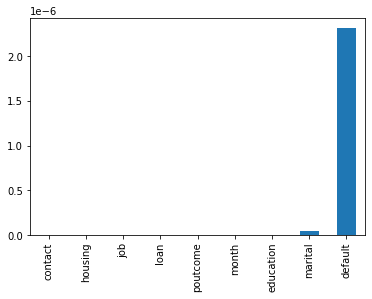

In [43]:
p_values.plot.bar()

<AxesSubplot:>

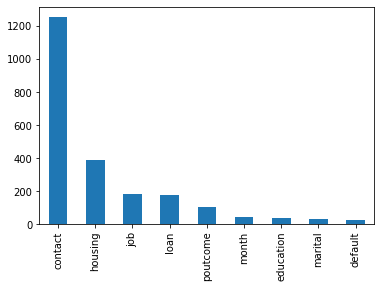

In [44]:
chi2_values.plot.bar()

In [47]:
# Three features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k = 3) 
X_kbest_features = chi2_features.fit_transform(X, Y) 
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 9
Reduced feature number: 3


In [48]:
index = chi2_features.get_support(indices=True)
print(index)

[1 4 6]


In [38]:
X

,education,job,marital,default,housing,loan,contact,month,poutcome
0,3,4,1,0,1,0,2,8,3
1,2,9,2,0,1,0,2,8,3
2,2,2,1,0,1,1,2,8,3
3,2,1,1,0,1,0,2,8,3
4,2,11,2,0,0,0,2,8,3
...,...,...,...,...,...,...,...,...,...
45206,3,9,1,0,0,0,0,9,3
45207,1,5,0,0,0,0,0,9,3
45208,2,5,1,0,0,0,0,9,2
45209,2,1,1,0,0,0,1,9,3


Features at index 1 , 4 and 6 are job , housing and contact respectively 

In [39]:
selected_features= ['job','housing','contact']

### b) Using Pearson Correlation Coefficient for Numeric Features vs Numeric Class

In [40]:
data=pd.read_csv("Finance.csv")

In [41]:
df=data.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [42]:
data['y'].dtype

dtype('O')

In [43]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

we can convert yes and no into 1 and 0 and change the data type from object to integer 

In [44]:
data['y']=data['y'].apply(lambda x:0 if x=='no' else 1)

In [45]:
data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [46]:
data['y'].dtype

dtype('int64')

In [47]:
cor_matrix=data.corr()

In [48]:
print(cor_matrix['y'].sort_values(ascending=False))

y           1.000000
duration    0.394521
pdays       0.103621
previous    0.093236
balance     0.052838
age         0.025155
day        -0.028348
campaign   -0.073172
Name: y, dtype: float64


In [49]:
cor_matrix

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


<AxesSubplot:>

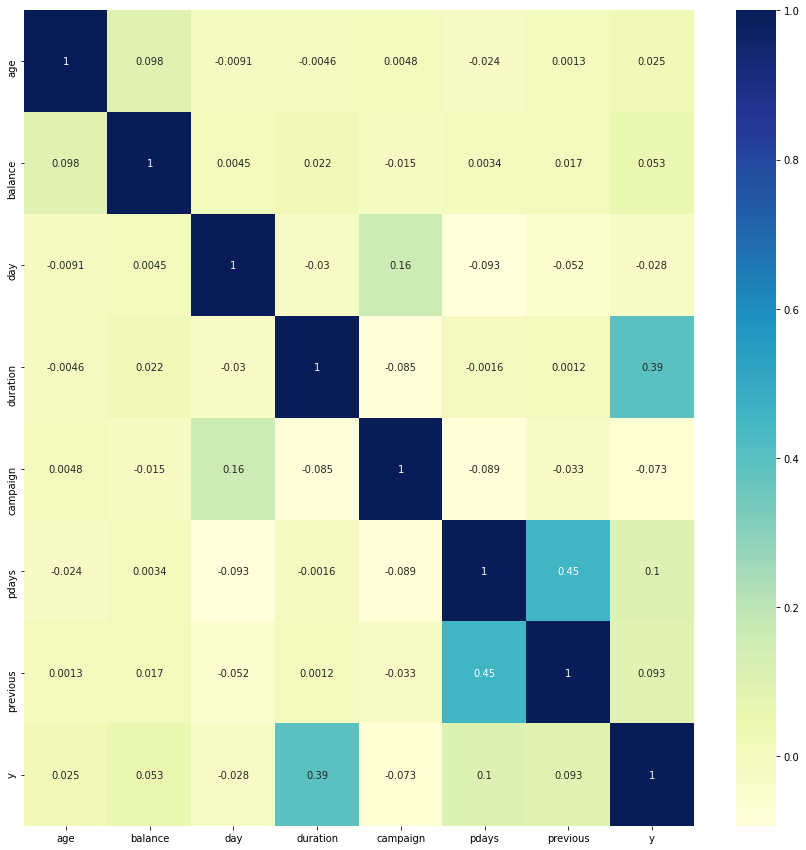

In [58]:
plt.figure(figsize=(15,15),facecolor='white')
sns.heatmap(cor_matrix.round(decimals=4), annot=True, cmap='YlGnBu')

In [51]:
features_cor=(cor_matrix['y'].sort_values(ascending=False))

In [52]:
selected_num_features= ['duration','pdays','previous']

In [53]:
best_features=selected_features+(selected_num_features)

In [54]:
best_features

['job', 'housing', 'contact', 'duration', 'pdays', 'previous']

In [55]:

data2=pd.concat([data[best_features],data['y']],axis=1)

In [56]:
data2

,job,housing,contact,duration,pdays,previous,y
0,management,yes,unknown,261,-1,0,0
1,technician,yes,unknown,151,-1,0,0
2,entrepreneur,yes,unknown,76,-1,0,0
3,blue-collar,yes,unknown,92,-1,0,0
4,unknown,no,unknown,198,-1,0,0
...,...,...,...,...,...,...,...
45206,technician,no,cellular,977,-1,0,1
45207,retired,no,cellular,456,-1,0,1
45208,retired,no,cellular,1127,184,3,1
45209,blue-collar,no,telephone,508,-1,0,0


Remarks:
Feature Selection using filter methods is independant of the machine learning model we use. Whether our seletced features will work better or not depends on the performance of ML model we apply. 